In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv("C:/Users/ravi theja/Documents/auto-insurance-fraud-detection/CLAIMS.csv")

In [68]:
df.head()

,FRAUDFOUND,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,PASTNUMBEROFCLAIMS,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE-CLAIM,NUMBEROFCARS,BASEPOLICY
0,Yes,5,Friday,Pontiac,Rural,Monday,Jan,5,Male,Single,...,none,6years,31to35,No,No,External,none,nochange,1vehicle,AllPerils
1,No,2,Sunday,Toyota,Urban,Friday,May,2,Female,Married,...,1,6years,36to40,No,No,External,none,nochange,3to4,Collision
2,Yes,5,Friday,Toyota,Urban,Friday,Feb,2,Male,Married,...,2to4,morethan7,51to65,No,No,External,none,nochange,1vehicle,AllPerils
3,Yes,5,Friday,Toyota,Urban,Tuesday,Feb,1,Male,Married,...,2to4,morethan7,51to65,No,No,External,morethan5,1year,1vehicle,AllPerils
4,Yes,5,Saturday,Chevrolet,Urban,Thursday,Feb,2,Male,Married,...,1,5years,31to35,No,No,External,none,nochange,1vehicle,AllPerils


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   FRAUDFOUND            1782 non-null   object
 1   WEEKOFMONTH           1782 non-null   int64 
 2   DAYOFWEEK             1782 non-null   object
 3   MAKE                  1782 non-null   object
 4   ACCIDENTAREA          1782 non-null   object
 5   DAYOFWEEKCLAIMED      1782 non-null   object
 6   MONTHCLAIMED          1782 non-null   object
 7   WEEKOFMONTHCLAIMED    1782 non-null   int64 
 8   SEX                   1782 non-null   object
 9   MARITALSTATUS         1782 non-null   object
 10  FAULT                 1782 non-null   object
 11  VEHICLECATEGORY       1782 non-null   object
 12  VEHICLEPRICE          1782 non-null   object
 13  POLICYNUMBER          1782 non-null   int64 
 14  REPNUMBER             1782 non-null   int64 
 15  DEDUCTIBLE            1782 non-null   

In [70]:
df.describe()

,WEEKOFMONTH,WEEKOFMONTHCLAIMED,POLICYNUMBER,REPNUMBER,DEDUCTIBLE,DRIVERRATING
count,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000
mean,2.749158,2.681257,7524.725028,8.379349,409.483726,2.515713
std,1.275800,1.273616,4430.396357,4.579791,46.250332,1.126243
min,1.000000,1.000000,1.000000,1.000000,300.000000,1.000000
25%,2.000000,2.000000,3634.250000,5.000000,400.000000,1.000000
50%,3.000000,3.000000,7408.000000,8.000000,400.000000,3.000000
75%,4.000000,4.000000,11359.500000,12.000000,400.000000,4.000000
max,5.000000,5.000000,15420.000000,16.000000,700.000000,4.000000


In [71]:
df.shape

(1782, 29)

In [72]:
df['MAKE'].unique()

array(['Pontiac', 'Toyota', 'Chevrolet', 'Mazda', 'Honda', 'Ford',
       'Accura', 'VW', 'Saturn', 'Saab', 'Dodge', 'Nisson', 'Mecedes',
       'Mercury', 'BMW'], dtype=object)

In [73]:
df.isnull().sum() 

FRAUDFOUND              0
WEEKOFMONTH             0
DAYOFWEEK               0
MAKE                    0
ACCIDENTAREA            0
DAYOFWEEKCLAIMED        0
MONTHCLAIMED            0
WEEKOFMONTHCLAIMED      0
SEX                     0
MARITALSTATUS           0
FAULT                   0
VEHICLECATEGORY         0
VEHICLEPRICE            0
POLICYNUMBER            0
REPNUMBER               0
DEDUCTIBLE              0
DRIVERRATING            0
DAYS:POLICY-ACCIDENT    0
DAYS:POLICY-CLAIM       0
PASTNUMBEROFCLAIMS      0
AGEOFVEHICLE            0
AGEOFPOLICYHOLDER       0
POLICEREPORTFILED       0
WITNESSPRESENT          0
AGENTTYPE               0
NUMBEROFSUPPLIMENTS     0
ADDRESSCHANGE-CLAIM     0
NUMBEROFCARS            0
BASEPOLICY              0
dtype: int64

In [74]:
pd.set_option('display.max_columns', None)  # Set the option to display all columns
df.head()

,FRAUDFOUND,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,FAULT,VEHICLECATEGORY,VEHICLEPRICE,POLICYNUMBER,REPNUMBER,DEDUCTIBLE,DRIVERRATING,DAYS:POLICY-ACCIDENT,DAYS:POLICY-CLAIM,PASTNUMBEROFCLAIMS,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE-CLAIM,NUMBEROFCARS,BASEPOLICY
0,Yes,5,Friday,Pontiac,Rural,Monday,Jan,5,Male,Single,PolicyHolder,Sedan,40_000 to 59_000,901,7,400,1,morethan30,morethan30,none,6years,31to35,No,No,External,none,nochange,1vehicle,AllPerils
1,No,2,Sunday,Toyota,Urban,Friday,May,2,Female,Married,ThirdParty,Sedan,20_000 to 29_000,903,11,400,3,morethan30,morethan30,1,6years,36to40,No,No,External,none,nochange,3to4,Collision
2,Yes,5,Friday,Toyota,Urban,Friday,Feb,2,Male,Married,PolicyHolder,Sedan,20_000 to 29_000,906,13,400,1,morethan30,morethan30,2to4,morethan7,51to65,No,No,External,none,nochange,1vehicle,AllPerils
3,Yes,5,Friday,Toyota,Urban,Tuesday,Feb,1,Male,Married,PolicyHolder,Sedan,20_000 to 29_000,911,16,400,2,morethan30,morethan30,2to4,morethan7,51to65,No,No,External,morethan5,1year,1vehicle,AllPerils
4,Yes,5,Saturday,Chevrolet,Urban,Thursday,Feb,2,Male,Married,PolicyHolder,Sedan,20_000 to 29_000,937,14,400,4,morethan30,morethan30,1,5years,31to35,No,No,External,none,nochange,1vehicle,AllPerils


In [75]:
df['SEX'] = df['SEX'].map({'Male': 0, 'Female': 1})
df['MARITALSTATUS'] = df['MARITALSTATUS'].map({'Single': 0, 'Married': 1})

In [76]:
df.head()

,FRAUDFOUND,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,FAULT,VEHICLECATEGORY,VEHICLEPRICE,POLICYNUMBER,REPNUMBER,DEDUCTIBLE,DRIVERRATING,DAYS:POLICY-ACCIDENT,DAYS:POLICY-CLAIM,PASTNUMBEROFCLAIMS,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE-CLAIM,NUMBEROFCARS,BASEPOLICY
0,Yes,5,Friday,Pontiac,Rural,Monday,Jan,5,0,0.0,PolicyHolder,Sedan,40_000 to 59_000,901,7,400,1,morethan30,morethan30,none,6years,31to35,No,No,External,none,nochange,1vehicle,AllPerils
1,No,2,Sunday,Toyota,Urban,Friday,May,2,1,1.0,ThirdParty,Sedan,20_000 to 29_000,903,11,400,3,morethan30,morethan30,1,6years,36to40,No,No,External,none,nochange,3to4,Collision
2,Yes,5,Friday,Toyota,Urban,Friday,Feb,2,0,1.0,PolicyHolder,Sedan,20_000 to 29_000,906,13,400,1,morethan30,morethan30,2to4,morethan7,51to65,No,No,External,none,nochange,1vehicle,AllPerils
3,Yes,5,Friday,Toyota,Urban,Tuesday,Feb,1,0,1.0,PolicyHolder,Sedan,20_000 to 29_000,911,16,400,2,morethan30,morethan30,2to4,morethan7,51to65,No,No,External,morethan5,1year,1vehicle,AllPerils
4,Yes,5,Saturday,Chevrolet,Urban,Thursday,Feb,2,0,1.0,PolicyHolder,Sedan,20_000 to 29_000,937,14,400,4,morethan30,morethan30,1,5years,31to35,No,No,External,none,nochange,1vehicle,AllPerils


In [77]:
df['MONTHCLAIMED'].unique()

array(['Jan', 'May', 'Feb', 'Mar', 'Jul', 'Jun', 'Nov', 'Apr', 'Oct',
       'Aug', 'Sep', 'Dec'], dtype=object)

In [78]:
df = df[df['MONTHCLAIMED'] != '0']

In [79]:
df['DAYOFWEEK'].unique()

array(['Friday', 'Sunday', 'Saturday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [80]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['DAYOFWEEK'] = df['DAYOFWEEK'].map(day_mapping)

In [81]:
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['DAYOFWEEKCLAIMED'] = df['DAYOFWEEKCLAIMED'].map(day_mapping)

In [82]:
df.head()


,FRAUDFOUND,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,FAULT,VEHICLECATEGORY,VEHICLEPRICE,POLICYNUMBER,REPNUMBER,DEDUCTIBLE,DRIVERRATING,DAYS:POLICY-ACCIDENT,DAYS:POLICY-CLAIM,PASTNUMBEROFCLAIMS,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE-CLAIM,NUMBEROFCARS,BASEPOLICY
0,Yes,5,4,Pontiac,Rural,0,Jan,5,0,0.0,PolicyHolder,Sedan,40_000 to 59_000,901,7,400,1,morethan30,morethan30,none,6years,31to35,No,No,External,none,nochange,1vehicle,AllPerils
1,No,2,6,Toyota,Urban,4,May,2,1,1.0,ThirdParty,Sedan,20_000 to 29_000,903,11,400,3,morethan30,morethan30,1,6years,36to40,No,No,External,none,nochange,3to4,Collision
2,Yes,5,4,Toyota,Urban,4,Feb,2,0,1.0,PolicyHolder,Sedan,20_000 to 29_000,906,13,400,1,morethan30,morethan30,2to4,morethan7,51to65,No,No,External,none,nochange,1vehicle,AllPerils
3,Yes,5,4,Toyota,Urban,1,Feb,1,0,1.0,PolicyHolder,Sedan,20_000 to 29_000,911,16,400,2,morethan30,morethan30,2to4,morethan7,51to65,No,No,External,morethan5,1year,1vehicle,AllPerils
4,Yes,5,5,Chevrolet,Urban,3,Feb,2,0,1.0,PolicyHolder,Sedan,20_000 to 29_000,937,14,400,4,morethan30,morethan30,1,5years,31to35,No,No,External,none,nochange,1vehicle,AllPerils


In [83]:
df['MAKE'].unique()

array(['Pontiac', 'Toyota', 'Chevrolet', 'Mazda', 'Honda', 'Ford',
       'Accura', 'VW', 'Saturn', 'Saab', 'Dodge', 'Nisson', 'Mecedes',
       'Mercury', 'BMW'], dtype=object)

In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['MAKE'] = le.fit_transform(df['MAKE'])

In [85]:
df.head()

,FRAUDFOUND,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,FAULT,VEHICLECATEGORY,VEHICLEPRICE,POLICYNUMBER,REPNUMBER,DEDUCTIBLE,DRIVERRATING,DAYS:POLICY-ACCIDENT,DAYS:POLICY-CLAIM,PASTNUMBEROFCLAIMS,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE-CLAIM,NUMBEROFCARS,BASEPOLICY
0,Yes,5,4,10,Rural,0,Jan,5,0,0.0,PolicyHolder,Sedan,40_000 to 59_000,901,7,400,1,morethan30,morethan30,none,6years,31to35,No,No,External,none,nochange,1vehicle,AllPerils
1,No,2,6,13,Urban,4,May,2,1,1.0,ThirdParty,Sedan,20_000 to 29_000,903,11,400,3,morethan30,morethan30,1,6years,36to40,No,No,External,none,nochange,3to4,Collision
2,Yes,5,4,13,Urban,4,Feb,2,0,1.0,PolicyHolder,Sedan,20_000 to 29_000,906,13,400,1,morethan30,morethan30,2to4,morethan7,51to65,No,No,External,none,nochange,1vehicle,AllPerils
3,Yes,5,4,13,Urban,1,Feb,1,0,1.0,PolicyHolder,Sedan,20_000 to 29_000,911,16,400,2,morethan30,morethan30,2to4,morethan7,51to65,No,No,External,morethan5,1year,1vehicle,AllPerils
4,Yes,5,5,2,Urban,3,Feb,2,0,1.0,PolicyHolder,Sedan,20_000 to 29_000,937,14,400,4,morethan30,morethan30,1,5years,31to35,No,No,External,none,nochange,1vehicle,AllPerils


In [86]:
df['NUMBEROFCARS'].unique()

array(['1vehicle', '3to4', '2vehicles', '5to8'], dtype=object)

In [87]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['FRAUDFOUND', 'ACCIDENTAREA', 'MONTHCLAIMED', 'FAULT', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'DAYS:POLICY-ACCIDENT', 'DAYS:POLICY-CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE-CLAIM', 'NUMBEROFCARS', 'BASEPOLICY']


In [88]:
categorical_columns

['FRAUDFOUND',
 'ACCIDENTAREA',
 'MONTHCLAIMED',
 'FAULT',
 'VEHICLECATEGORY',
 'VEHICLEPRICE',
 'DAYS:POLICY-ACCIDENT',
 'DAYS:POLICY-CLAIM',
 'PASTNUMBEROFCLAIMS',
 'AGEOFVEHICLE',
 'AGEOFPOLICYHOLDER',
 'POLICEREPORTFILED',
 'WITNESSPRESENT',
 'AGENTTYPE',
 'NUMBEROFSUPPLIMENTS',
 'ADDRESSCHANGE-CLAIM',
 'NUMBEROFCARS',
 'BASEPOLICY']

In [89]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['AccidentArea',
 'Fault',
 'VehicleCategory',
 'VehiclePrice',
 'DAYS:POLICY-ACCIDENT',
 'Days:Policy-Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange-Claim',
 'NumberOfCars',
 'BasePolicy']

le = LabelEncoder()

for column in columns_to_encode:
    df[column.upper()] = le.fit_transform(df[column.upper()])

In [90]:
df.head()

,FRAUDFOUND,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,FAULT,VEHICLECATEGORY,VEHICLEPRICE,POLICYNUMBER,REPNUMBER,DEDUCTIBLE,DRIVERRATING,DAYS:POLICY-ACCIDENT,DAYS:POLICY-CLAIM,PASTNUMBEROFCLAIMS,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE-CLAIM,NUMBEROFCARS,BASEPOLICY
0,Yes,5,4,10,0,0,Jan,5,0,0.0,0,0,2,901,7,400,1,3,2,3,4,4,0,0,0,3,3,0,0
1,No,2,6,13,1,4,May,2,1,1.0,1,0,0,903,11,400,3,3,2,0,4,5,0,0,0,3,3,2,1
2,Yes,5,4,13,1,4,Feb,2,0,1.0,0,0,0,906,13,400,1,3,2,1,6,7,0,0,0,3,3,0,0
3,Yes,5,4,13,1,1,Feb,1,0,1.0,0,0,0,911,16,400,2,3,2,1,6,7,0,0,0,2,0,0,0
4,Yes,5,5,2,1,3,Feb,2,0,1.0,0,0,0,937,14,400,4,3,2,0,3,4,0,0,0,3,3,0,0


In [91]:
df.columns

Index(['FRAUDFOUND', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA',
       'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX',
       'MARITALSTATUS', 'FAULT', 'VEHICLECATEGORY', 'VEHICLEPRICE',
       'POLICYNUMBER', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING',
       'DAYS:POLICY-ACCIDENT', 'DAYS:POLICY-CLAIM', 'PASTNUMBEROFCLAIMS',
       'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED',
       'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS',
       'ADDRESSCHANGE-CLAIM', 'NUMBEROFCARS', 'BASEPOLICY'],
      dtype='object')

In [92]:
y = df['FRAUDFOUND']
X = df.drop('FRAUDFOUND', axis = 1)

In [93]:
X.describe()

,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,FAULT,VEHICLECATEGORY,VEHICLEPRICE,POLICYNUMBER,REPNUMBER,DEDUCTIBLE,DRIVERRATING,DAYS:POLICY-ACCIDENT,DAYS:POLICY-CLAIM,PASTNUMBEROFCLAIMS,AGEOFVEHICLE,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE-CLAIM,NUMBEROFCARS,BASEPOLICY
count,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1767.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000
mean,2.749158,2.814254,7.603255,0.878227,1.875421,2.681257,0.133558,0.710243,0.148709,0.298541,1.548260,7524.725028,8.379349,409.483726,2.515713,2.988777,1.987093,1.498316,4.778339,4.814815,0.018519,0.003367,0.009540,2.039282,2.862514,0.107744,0.807520
std,1.275800,1.979899,4.034836,0.327116,1.465750,1.273616,0.340272,0.453778,0.355902,0.531530,1.962499,4430.396357,4.579791,46.250332,1.126243,0.211643,0.154845,1.161205,1.153917,1.438011,0.134855,0.057944,0.097232,1.112748,0.505620,0.408578,0.731492
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,5.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3634.250000,5.000000,400.000000,1.000000,3.000000,2.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
50%,3.000000,3.000000,6.000000,1.000000,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,7408.000000,8.000000,400.000000,3.000000,3.000000,2.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000
75%,4.000000,4.000000,10.000000,1.000000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,4.000000,11359.500000,12.000000,400.000000,4.000000,3.000000,2.000000,3.000000,6.000000,6.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000
max,5.000000,6.000000,14.000000,1.000000,6.000000,5.000000,1.000000,1.000000,1.000000,2.000000,5.000000,15420.000000,16.000000,700.000000,4.000000,4.000000,2.000000,3.000000,7.000000,8.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3.000000,2.000000


In [94]:
y.describe()

count     1782
unique       2
top        Yes
freq       923
Name: FRAUDFOUND, dtype: object

In [95]:
# Check the number of rows and columns
print(df.shape)

(1782, 29)


In [96]:
print(df.dtypes)

FRAUDFOUND               object
WEEKOFMONTH               int64
DAYOFWEEK                 int64
MAKE                      int32
ACCIDENTAREA              int32
DAYOFWEEKCLAIMED          int64
MONTHCLAIMED             object
WEEKOFMONTHCLAIMED        int64
SEX                       int64
MARITALSTATUS           float64
FAULT                     int32
VEHICLECATEGORY           int32
VEHICLEPRICE              int32
POLICYNUMBER              int64
REPNUMBER                 int64
DEDUCTIBLE                int64
DRIVERRATING              int64
DAYS:POLICY-ACCIDENT      int32
DAYS:POLICY-CLAIM         int32
PASTNUMBEROFCLAIMS        int32
AGEOFVEHICLE              int32
AGEOFPOLICYHOLDER         int32
POLICEREPORTFILED         int32
WITNESSPRESENT            int32
AGENTTYPE                 int32
NUMBEROFSUPPLIMENTS       int32
ADDRESSCHANGE-CLAIM       int32
NUMBEROFCARS              int32
BASEPOLICY                int32
dtype: object


In [97]:
print(df.isnull().sum())

FRAUDFOUND               0
WEEKOFMONTH              0
DAYOFWEEK                0
MAKE                     0
ACCIDENTAREA             0
DAYOFWEEKCLAIMED         0
MONTHCLAIMED             0
WEEKOFMONTHCLAIMED       0
SEX                      0
MARITALSTATUS           15
FAULT                    0
VEHICLECATEGORY          0
VEHICLEPRICE             0
POLICYNUMBER             0
REPNUMBER                0
DEDUCTIBLE               0
DRIVERRATING             0
DAYS:POLICY-ACCIDENT     0
DAYS:POLICY-CLAIM        0
PASTNUMBEROFCLAIMS       0
AGEOFVEHICLE             0
AGEOFPOLICYHOLDER        0
POLICEREPORTFILED        0
WITNESSPRESENT           0
AGENTTYPE                0
NUMBEROFSUPPLIMENTS      0
ADDRESSCHANGE-CLAIM      0
NUMBEROFCARS             0
BASEPOLICY               0
dtype: int64


In [98]:
print(df.describe())

       WEEKOFMONTH    DAYOFWEEK         MAKE  ACCIDENTAREA  DAYOFWEEKCLAIMED  \
count  1782.000000  1782.000000  1782.000000   1782.000000       1782.000000   
mean      2.749158     2.814254     7.603255      0.878227          1.875421   
std       1.275800     1.979899     4.034836      0.327116          1.465750   
min       1.000000     0.000000     0.000000      0.000000          0.000000   
25%       2.000000     1.000000     5.000000      1.000000          1.000000   
50%       3.000000     3.000000     6.000000      1.000000          2.000000   
75%       4.000000     4.000000    10.000000      1.000000          3.000000   
max       5.000000     6.000000    14.000000      1.000000          6.000000   

       WEEKOFMONTHCLAIMED          SEX  MARITALSTATUS        FAULT  \
count         1782.000000  1782.000000    1767.000000  1782.000000   
mean             2.681257     0.133558       0.710243     0.148709   
std              1.273616     0.340272       0.453778     0.355902   

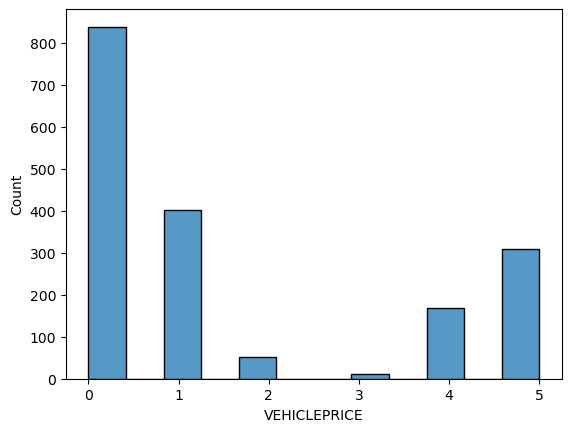

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['VEHICLEPRICE'])
plt.show()

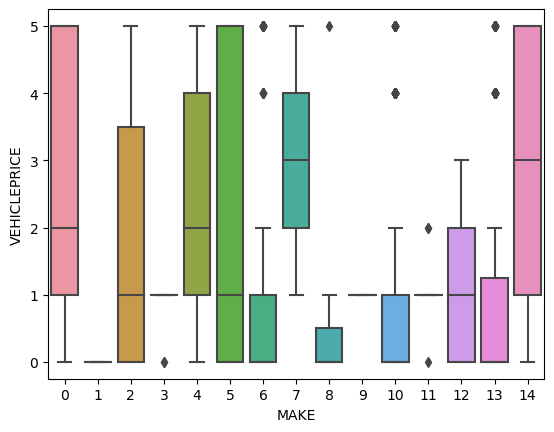

In [102]:
sns.boxplot(x='MAKE', y='VEHICLEPRICE', data=df)
plt.show()

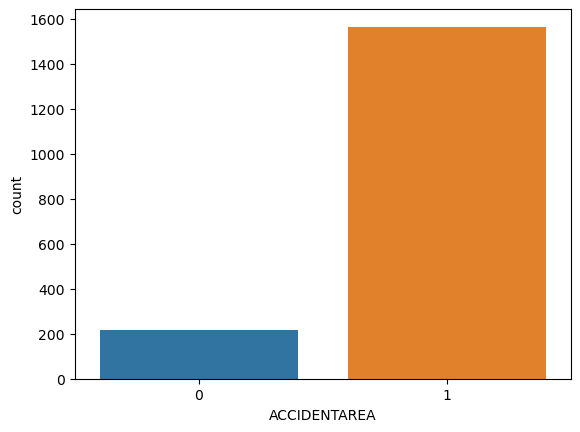

In [103]:
sns.countplot(x='ACCIDENTAREA', data=df)
plt.show()